<a href="https://colab.research.google.com/github/ashutosh17dec/dl/blob/master/Ashutosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
article=pd.read_csv('/content/drive/My Drive/Ashutosh/article_information.csv',sep=',',header=0)
article.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ArticleID,Title,Journal,PubDate,Volume,Issue,Page
0,10.1103/PhysRevApplied.6.064012,Method to Control Dynamic Snap-Through Instabi...,Phys. Rev. Applied,2016-12-23,6,6,064012
1,10.1103/PhysRevApplied.6.024026,Thin Circular Diamond Membrane with Embedded N...,Phys. Rev. Applied,2016-08-31,6,2,024026
2,10.1103/PhysRevApplied.6.064004,Simultaneous Rheoelectric Measurements of Stro...,Phys. Rev. Applied,2016-12-09,6,6,064004
3,10.1103/PhysRevApplied.6.014003,Fragility of Nonlocal Edge-Mode Transport in t...,Phys. Rev. Applied,2016-07-07,6,1,014003
4,10.1103/PhysRevApplied.6.064028,Nonvolatile Multilevel Memory and Boolean Logi...,Phys. Rev. Applied,2016-12-30,6,6,064028


In [5]:
citation=pd.read_csv('/content/drive/My Drive/Ashutosh/citation_relationships.csv',sep=',')
citation.head()

,CitingArticleID,CitedArticleID
0,10.1103/PhysRevSeriesI.11.215,10.1103/PhysRevSeriesI.1.1
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.1.1
2,10.1103/RevModPhys.51.863,10.1103/PhysRevSeriesI.1.1
3,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1
4,10.1103/PhysRevSeriesI.2.161,10.1103/PhysRevSeriesI.1.1


In [0]:
article['Year']=article['PubDate'].apply(lambda x: x[:4])

Text(0.5, 0, 'Year')

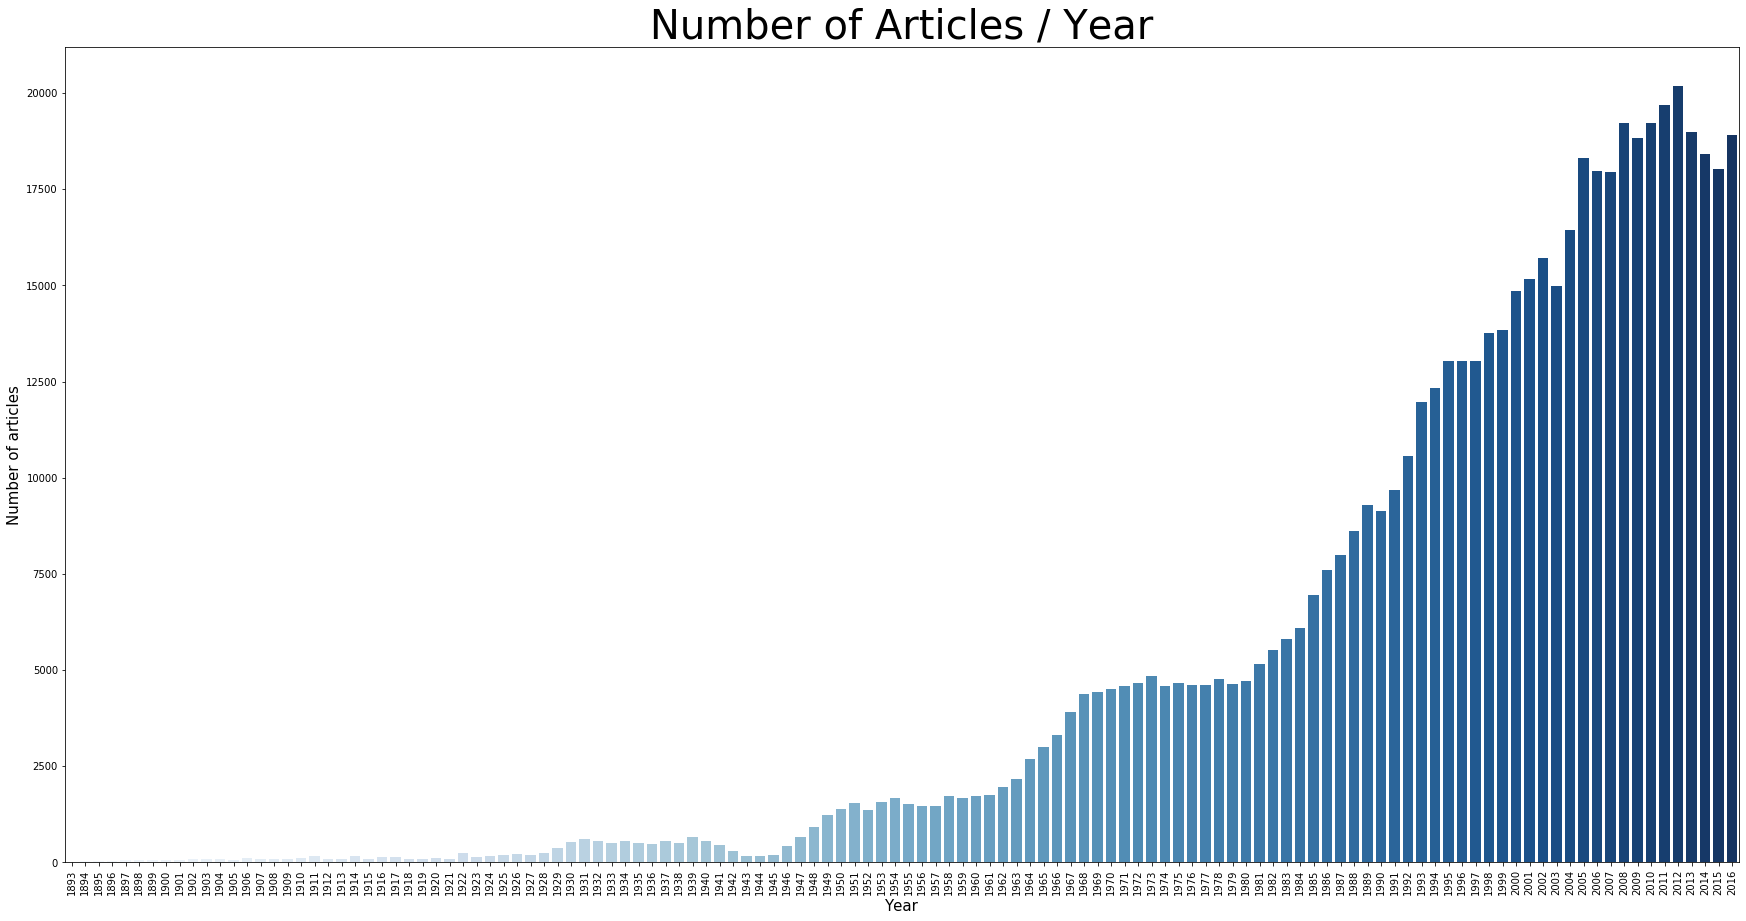

In [7]:
plt.figure(figsize=(30,15))

sns.countplot(article['Year'],palette="Blues")

plt.xticks(rotation=90)
plt.title("Number of Articles / Year",fontsize=40)
plt.ylabel("Number of articles",fontsize=15)
plt.xlabel("Year",fontsize=15)

In [0]:
g1=citation.groupby(by='CitedArticleID').count() # Number of times these articles were cited
g1=g1.reset_index()
g1.rename(columns={"CitedArticleID": "ArticleID","CitingArticleID":"Number of times Cited"},inplace=True)

In [0]:
g2=citation.groupby(by='CitingArticleID').count() # number of references per article
g2=g2.reset_index()
g2.rename(columns={"CitingArticleID": "ArticleID","CitedArticleID":"Number of references in the article"},inplace=True)

In [0]:
big=pd.merge(article,g1,how='outer',on='ArticleID')
big1=pd.merge(big,g2,how='outer',on='ArticleID')

In [11]:
len(set(article['ArticleID'])) #No of unqiue article IDs in the first CSV

596786

In [12]:
len(set(citation['CitedArticleID'])) # No of unique article IDs in the second csv

515867

In [13]:
len(set(citation['CitingArticleID']))# No of unique article IDs in the second csv

576660

In [14]:
sum(big1['Title'].isnull()) # number of new articleId's that aren't present in the 1st csv

8195

#Probability distribution of 'Number of times cited'

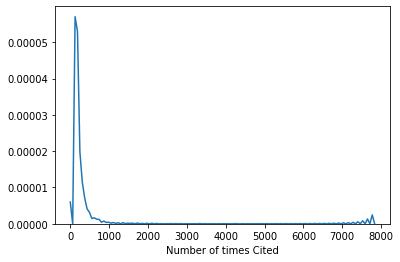

In [15]:
sns.distplot(g1['Number of times Cited'],hist=False)

Median of the above probability distribution. Average number of citation most paper have.

In [20]:
np.median(g1['Number of times Cited'])

6.0

#Probability distribution of 'Number of references in the article'

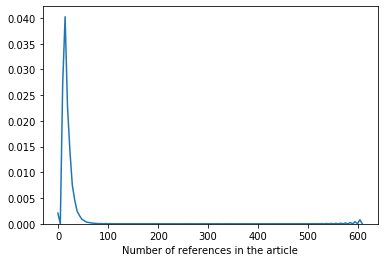

In [21]:
sns.distplot(g2['Number of references in the article'],hist=False)

Median of the above distribution = Average number of citation most paper have is 10. 

In [22]:
np.median(g2['Number of references in the article'])

10.0

#A outter join of both the csv

In [23]:
big1 #A outter join of both the csv.

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page,Year,Number of times Cited,Number of references in the article
0,10.1103/PhysRevApplied.6.064012,Method to Control Dynamic Snap-Through Instabi...,Phys. Rev. Applied,2016-12-23,6.0,6,064012,2016,NaN,6.0
1,10.1103/PhysRevApplied.6.024026,Thin Circular Diamond Membrane with Embedded N...,Phys. Rev. Applied,2016-08-31,6.0,2,024026,2016,NaN,10.0
2,10.1103/PhysRevApplied.6.064004,Simultaneous Rheoelectric Measurements of Stro...,Phys. Rev. Applied,2016-12-09,6.0,6,064004,2016,NaN,13.0
3,10.1103/PhysRevApplied.6.014003,Fragility of Nonlocal Edge-Mode Transport in t...,Phys. Rev. Applied,2016-07-07,6.0,1,014003,2016,NaN,4.0
4,10.1103/PhysRevApplied.6.064028,Nonvolatile Multilevel Memory and Boolean Logi...,Phys. Rev. Applied,2016-12-30,6.0,6,064028,2016,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
604976,10.1103/RevModPhys.89.025001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
604977,10.1103/RevModPhys.89.025002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
604978,10.1103/RevModPhys.89.025003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
604979,10.1103/RevModPhys.89.025004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0


#Article having most number of citation

In [25]:
big1[big1['Number of times Cited']==big1['Number of times Cited'].max()]

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page,Year,Number of times Cited,Number of references in the article
455789,10.1103/PhysRevLett.77.3865,Generalized Gradient Approximation Made Simple,Phys. Rev. Lett.,1996-10-28,77.0,18,3865,1996,7834.0,27.0


Citations of the above article

In [26]:
citation[citation['CitedArticleID']=='10.1103/PhysRevLett.77.3865']

,CitingArticleID,CitedArticleID
3721573,10.1103/PhysRevB.72.214116,10.1103/PhysRevLett.77.3865
3721574,10.1103/PhysRevB.78.075211,10.1103/PhysRevLett.77.3865
3721575,10.1103/PhysRevB.78.045416,10.1103/PhysRevLett.77.3865
3721576,10.1103/PhysRevB.78.165419,10.1103/PhysRevLett.77.3865
3721577,10.1103/PhysRevB.84.174425,10.1103/PhysRevLett.77.3865
...,...,...
3729402,10.1103/PhysRevB.95.184432,10.1103/PhysRevLett.77.3865
3729403,10.1103/PhysRevB.95.195163,10.1103/PhysRevLett.77.3865
3729404,10.1103/PhysRevB.95.195159,10.1103/PhysRevLett.77.3865
3729405,10.1103/PhysRevLett.118.227401,10.1103/PhysRevLett.77.3865


In [0]:
big1["Number of times Cited"].fillna(0,inplace=True)
big1['Number of references in the article'].fillna(big1['Number of references in the article'].mode(),inplace=True)

In [0]:
big1.dropna(inplace=True)

In [0]:
z1=big1.groupby(by='Journal').sum()

In [0]:
z2=big1.groupby(by='Journal').count()

#Article details of PhyRevLett(Journal having highest number of citation)

In [47]:
PRL = big1[big1['Journal']=='Phys. Rev. Lett.']
PRL

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page,Year,Number of times Cited,Number of references in the article
357555,10.1103/PhysRevLett.61.207,Mean-Field Calculation of the Antiferromagneti...,Phys. Rev. Lett.,1988-07-11,61.0,2,207,1988,3.0,8.0
357556,10.1103/PhysRevLett.61.2109,Oscillatory Deformation of Chemical Waves Indu...,Phys. Rev. Lett.,1988-10-31,61.0,18,2109,1988,10.0,1.0
357557,10.1103/PhysRevLett.61.1549,Method of Calculating Nonperturbative Effects ...,Phys. Rev. Lett.,1988-10-03,61.0,14,1549,1988,17.0,2.0
357558,10.1103/PhysRevLett.61.1119,Nonlinear Optical Susceptibilities of a One-Di...,Phys. Rev. Lett.,1988-08-29,61.0,9,1119,1988,20.0,6.0
357559,10.1103/PhysRevLett.61.1267,"<span class=""aps-inline-formula""><math xmlns=""...",Phys. Rev. Lett.,1988-09-12,61.0,11,1267,1988,15.0,8.0
...,...,...,...,...,...,...,...,...,...,...
475676,10.1103/PhysRevLett.25.1377,Determination of the Photoproduction Phase of ...,Phys. Rev. Lett.,1970-11-09,25.0,19,1377,1970,10.0,7.0
475677,10.1103/PhysRevLett.25.599,Study of Nuclear States of Several Odd-<span c...,Phys. Rev. Lett.,1970-08-31,25.0,9,599,1970,3.0,8.0
475678,10.1103/PhysRevLett.25.433,"Spectroscopic Measurement of the Frequency, In...",Phys. Rev. Lett.,1970-08-17,25.0,7,433,1970,2.0,2.0
475679,10.1103/PhysRevLett.25.126,Comparison of Proton Momentum Spectra in Proto...,Phys. Rev. Lett.,1970-07-13,25.0,2,126,1970,20.0,9.0


In [51]:
print('mean citation of articles published in PhysRevLett',np.mean( PRL['Number of times Cited']))
print('median citation of articles published in PhysRevLett',np.median(PRL['Number of times Cited']))

mean citation of articles published in PhysRevLett 20.847243923807117
median citation of articles published in PhysRevLett 10.0


#Metric to find top Journals

In [36]:
hypo1=pd.DataFrame()
hypo1["Journal_Name"]=z1.index.values
hypo1["Number of articles published in the journal"]=z2['Number of times Cited'].values
hypo1["Total number of citations for the journal"]=z1['Number of times Cited'].values
hypo1["Ratio of Number of citations to the number of art. published"]=hypo1["Total number of citations for the journal"]/hypo1["Number of articles published in the journal"]
hypo1

,Journal_Name,Number of articles published in the journal,Total number of citations for the journal,Ratio of Number of citations to the number of art. published
0,Phys. Rev.,42050,651665.0,15.497384
1,Phys. Rev. (Series I),200,213.0,1.065000
2,Phys. Rev. A,71077,658641.0,9.266584
3,Phys. Rev. Accel. Beams,187,96.0,0.513369
4,Phys. Rev. Applied,556,742.0,1.334532
5,Phys. Rev. B,172367,1770841.0,10.273666
6,Phys. Rev. C,36685,326572.0,8.902058
7,Phys. Rev. D,77675,886698.0,11.415488
8,Phys. Rev. E,51042,274088.0,5.369852
9,Phys. Rev. Fluids,182,49.0,0.269231


Text(0.5, 1.0, 'Ratio of number of citations to the number of art. published for each journal')

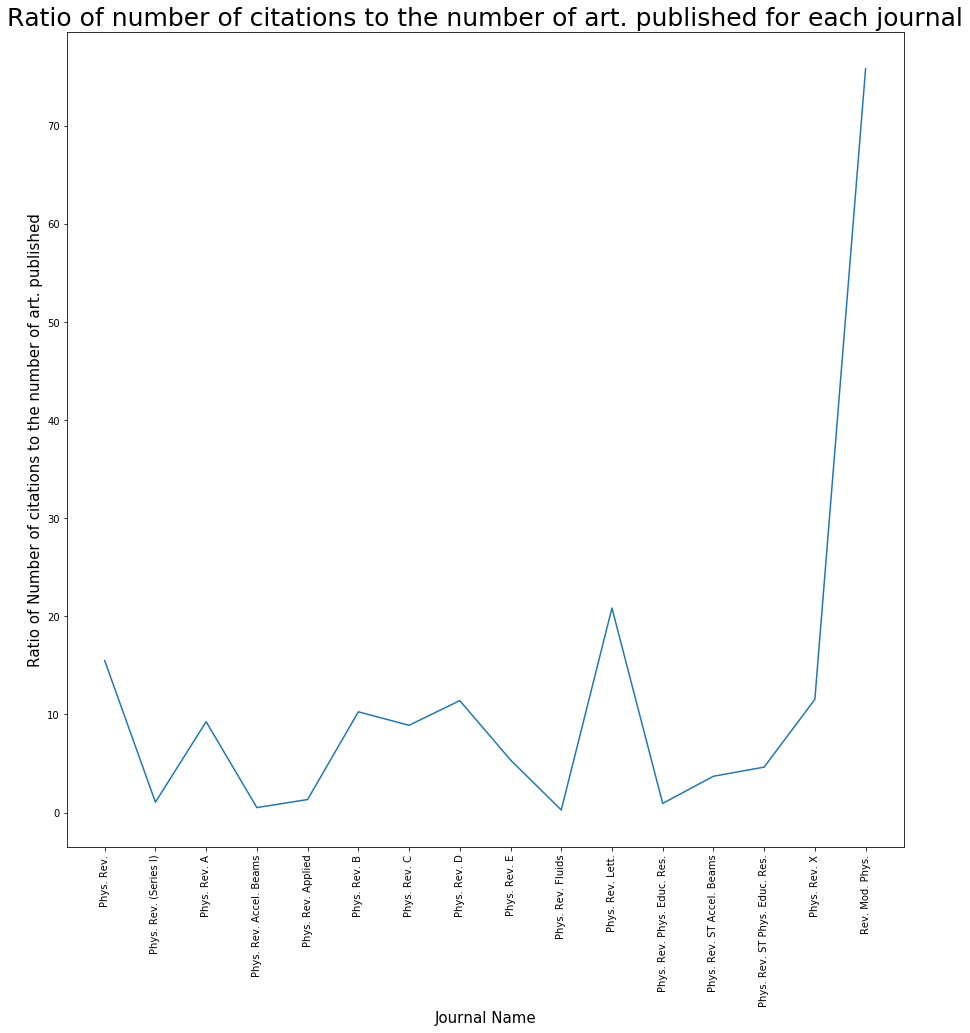

In [37]:
x=range(1,17)
plt.figure(figsize=(15,15))
plt.xticks(x,hypo1['Journal_Name'],rotation=90)
plt.plot(x,hypo1['Ratio of Number of citations to the number of art. published'])
plt.ylabel("Ratio of Number of citations to the number of art. published",size=15)
plt.xlabel("Journal Name",size=15)
plt.title("Ratio of number of citations to the number of art. published for each journal",size=25)

Interestingly what we see here is that the journal having the maximum number of citation is not the best journal according to our journal ranking metric. But it takes the second spot. We should also note that Phys.Rev.Lett also published the article with the maximum number of citations.

Text(0.5, 1.0, 'Number of citations and number of articles published per journal')

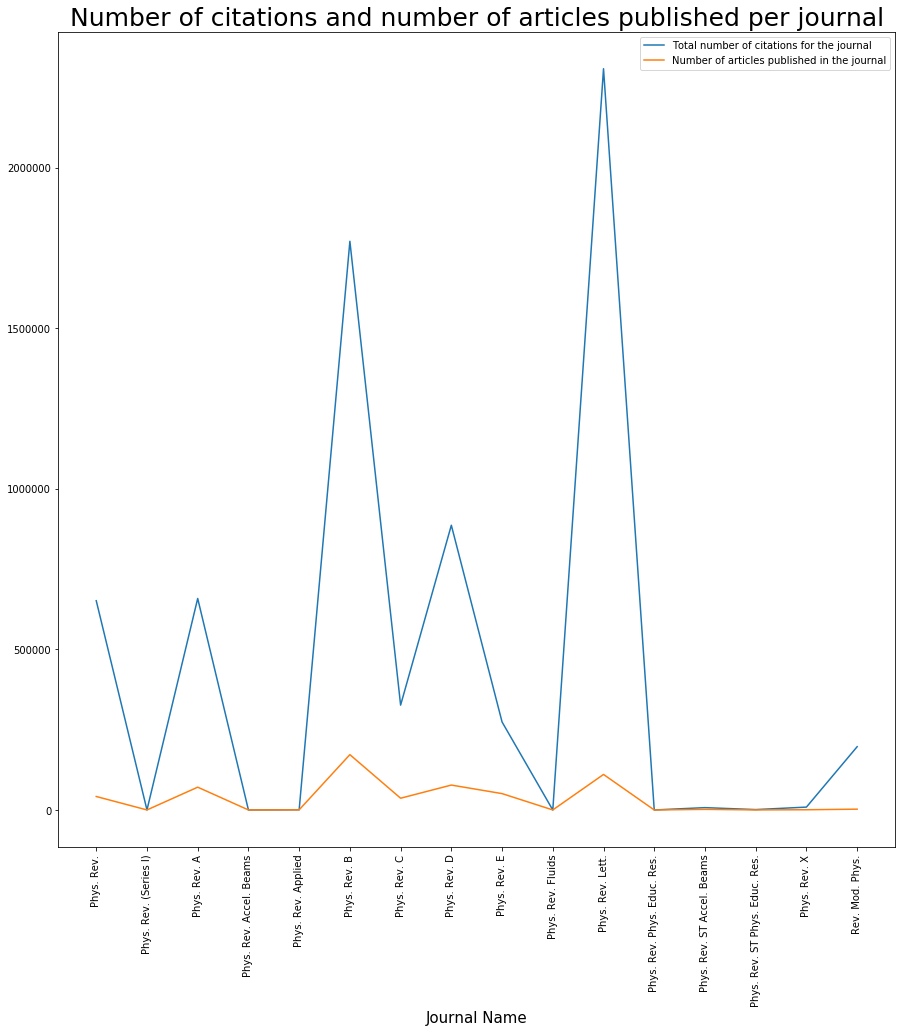

In [0]:
plt.figure(figsize=(15,15))
plt.xticks(x,hypo1['Journal_Name'],rotation=90)
plt.plot(x,hypo1['Total number of citations for the journal'],label='Total number of citations for the journal')
plt.plot(x,hypo1['Number of articles published in the journal'],label='Number of articles published in the journal')
plt.legend()
#plt.ylabel("Total number of citations for the journal",size=15)
plt.xlabel("Journal Name",size=15)
plt.title("Number of citations and number of articles published per journal",size=25)

From the above graph it is apparant that Rev.Mod.Phys came out best in our metric test because of the low number of articles it publish. From this we can also see that 

#Comparative study of Phys Rev Lett and Rev Mod Phys:

In [42]:
RevModP = big1[big1['Journal']=='Rev. Mod. Phys.']
RevModP

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page,Year,Number of times Cited,Number of references in the article
75946,10.1103/RevModPhys.61.547,Observations in particle physics from two neut...,Rev. Mod. Phys.,1989-07-01,61.0,3,547,1989,0.0,26.0
75950,10.1103/RevModPhys.61.185,The large-scale structure of the universe: Tur...,Rev. Mod. Phys.,1989-04-01,61.0,2,185,1989,78.0,11.0
75951,10.1103/RevModPhys.61.605,Thermal boundary resistance,Rev. Mod. Phys.,1989-07-01,61.0,3,605,1989,192.0,90.0
75952,10.1103/RevModPhys.61.131,Pairing fluctuations in rapidly rotating nuclei,Rev. Mod. Phys.,1989-01-01,61.0,1,131,1989,44.0,18.0
75953,10.1103/RevModPhys.61.561,Quantum gravity: an introduction to some recen...,Rev. Mod. Phys.,1989-07-01,61.0,3,561,1989,19.0,30.0
...,...,...,...,...,...,...,...,...,...,...
79198,10.1103/RevModPhys.25.332,Observations on Antiferromagnetic Cu<span clas...,Rev. Mod. Phys.,1953-01-01,25.0,1,332,1953,7.0,1.0
79199,10.1103/RevModPhys.25.277,Antiferromagnetism and Antiferromagnetic Reson...,Rev. Mod. Phys.,1953-01-01,25.0,1,277,1953,7.0,6.0
79202,10.1103/RevModPhys.25.353,On the Theory of the Ising Model of Ferromagne...,Rev. Mod. Phys.,1953-04-01,25.0,2,353,1953,66.0,19.0
79204,10.1103/RevModPhys.25.451,Gravitational Motion,Rev. Mod. Phys.,1953-04-01,25.0,2,451,1953,6.0,7.0


In [50]:
print('mean citation of articles published in RevModPhys',np.mean( RevModP['Number of times Cited']))
print('median citation of articles published in RevModPhys',np.median(RevModP['Number of times Cited']))
print('mean citation of articles published in PhysRevLett',np.mean( PRL['Number of times Cited']))
print('median citation of articles published in PhysRevLett',np.median(PRL['Number of times Cited']))

mean citation of articles published in RevModPhys 75.80923076923077
median citation of articles published in RevModPhys 20.0
mean citation of articles published in PhysRevLett 20.847243923807117
median citation of articles published in PhysRevLett 10.0


The above comparative study show that the quality of artices published in RevModPhys is more than PhysRevLett on an average.

#Normalised data:

In [0]:
hypo1['Total number of citations for the journal']=hypo1['Total number of citations for the journal']/hypo1['Total number of citations for the journal'].max()
hypo1['Number of articles published in the journal']=hypo1['Number of articles published in the journal']/hypo1['Number of articles published in the journal'].max()

In [56]:
hypo1

,Journal_Name,Number of articles published in the journal,Total number of citations for the journal,Ratio of Number of citations to the number of art. published
0,Phys. Rev.,0.243956,0.282328,15.497384
1,Phys. Rev. (Series I),0.001160,0.000092,1.065000
2,Phys. Rev. A,0.412359,0.285350,9.266584
3,Phys. Rev. Accel. Beams,0.001085,0.000042,0.513369
4,Phys. Rev. Applied,0.003226,0.000321,1.334532
5,Phys. Rev. B,1.000000,0.767200,10.273666
6,Phys. Rev. C,0.212831,0.141484,8.902058
7,Phys. Rev. D,0.450637,0.384154,11.415488
8,Phys. Rev. E,0.296124,0.118746,5.369852
9,Phys. Rev. Fluids,0.001056,0.000021,0.269231


Text(0.5, 0, 'Journal Name')

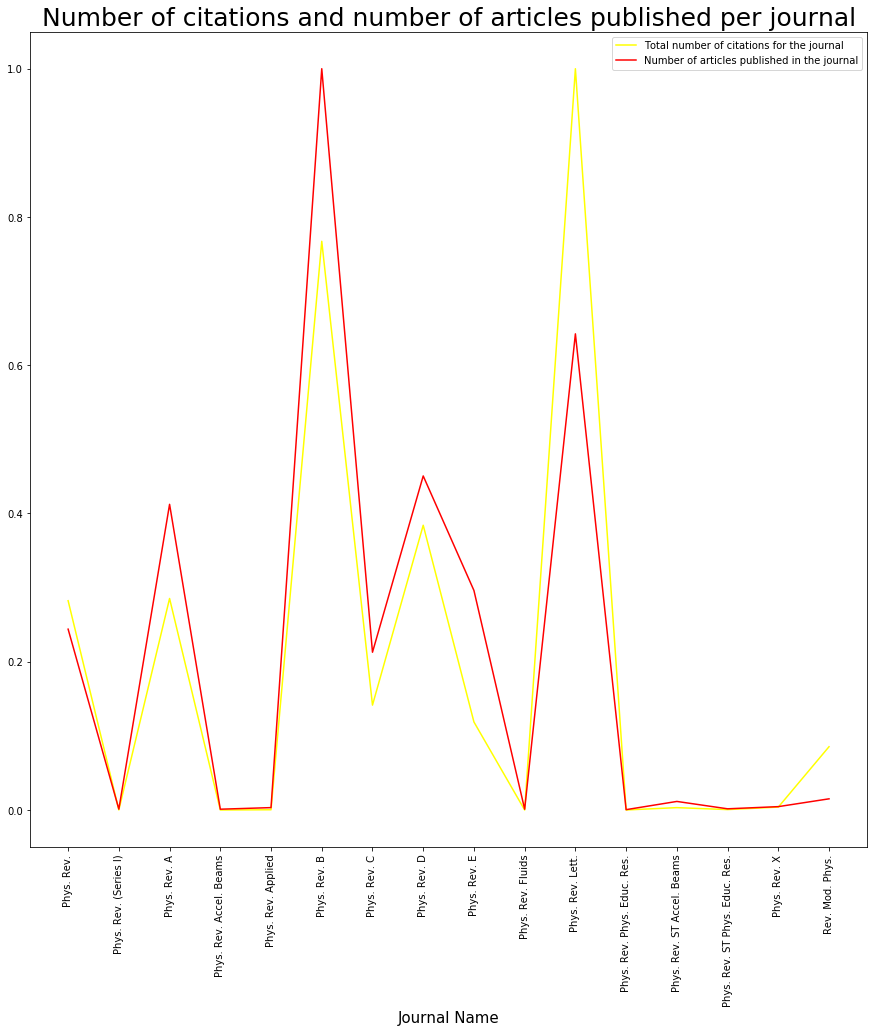

In [57]:
plt.figure(figsize=(15,15))
plt.xticks(x,hypo1['Journal_Name'],rotation=90)
plt.plot(x,hypo1['Total number of citations for the journal'],label='Total number of citations for the journal',c='yellow')
plt.plot(x,hypo1['Number of articles published in the journal'],label='Number of articles published in the journal',c='r')
plt.legend()
#plt.ylabel("Total number of citations for the journal",size=15)
plt.title("Number of citations and number of articles published per journal",size=25)
plt.xlabel("Journal Name",size=15)

#Top ten most cited articles

In [0]:
big2=big1.sort_values(by='Number of times Cited',ascending=False)

In [60]:
big2[:10]

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page,Year,Number of times Cited,Number of references in the article
455789,10.1103/PhysRevLett.77.3865,Generalized Gradient Approximation Made Simple,Phys. Rev. Lett.,1996-10-28,77.0,18,3865,1996,7834.0,27.0
125280,10.1103/PhysRev.140.A1133,Self-Consistent Equations Including Exchange a...,Phys. Rev.,1965-11-15,140.0,4A,A1133,1965,7016.0,10.0
105703,10.1103/PhysRev.136.B864,Inhomogeneous Electron Gas,Phys. Rev.,1964-11-09,136.0,3B,B864,1964,5615.0,8.0
231038,10.1103/PhysRevB.54.11169,Efficient iterative schemes for <i>ab initio</...,Phys. Rev. B,1996-10-15,54.0,16,11169,1996,5527.0,41.0
275490,10.1103/PhysRevB.23.5048,Self-interaction correction to density-functio...,Phys. Rev. B,1981-05-15,23.0,10,5048,1981,4261.0,67.0
301155,10.1103/PhysRevB.13.5188,Special points for Brillouin-zone integrations,Phys. Rev. B,1976-06-15,13.0,12,5188,1976,4244.0,2.0
138211,10.1103/PhysRevB.50.17953,Projector augmented-wave method,Phys. Rev. B,1994-12-15,50.0,24,17953,1994,4021.0,39.0
130285,10.1103/PhysRevB.59.1758,From ultrasoft pseudopotentials to the project...,Phys. Rev. B,1999-01-15,59.0,3,1758,1999,3920.0,38.0
392451,10.1103/PhysRevLett.45.566,Ground State of the Electron Gas by a Stochast...,Phys. Rev. Lett.,1980-08-18,45.0,7,566,1980,3325.0,5.0
78814,10.1103/RevModPhys.82.3045,<i>Colloquium</i>: Topological insulators,Rev. Mod. Phys.,2010-11-08,82.0,4,3045,2010,2895.0,100.0


#Year wise study of data:

In [67]:
z3=big1.groupby(by='Year').count()
z3

,ArticleID,Title,Journal,PubDate,Volume,Issue,Page,Number of times Cited,Number of references in the article
Year,,,,,,,,,
1894,2,2,2,2,2,2,2,2,2
1895,1,1,1,1,1,1,1,1,1
1896,2,2,2,2,2,2,2,2,2
1897,7,7,7,7,7,7,7,7,7
1898,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
2012,19534,19534,19534,19534,19534,19534,19534,19534,19534
2013,18441,18441,18441,18441,18441,18441,18441,18441,18441
2014,17861,17861,17861,17861,17861,17861,17861,17861,17861


In [70]:
z4=big1.groupby(by='Year').sum()
z4

,Volume,Number of times Cited,Number of references in the article
Year,,,
1894,4.0,3.0,2.0
1895,2.0,2.0,1.0
1896,7.0,2.0,2.0
1897,32.0,6.0,8.0
1898,33.0,4.0,6.0
...,...,...,...
2012,1738345.0,147160.0,335168.0
2013,1674054.0,116217.0,332519.0
2014,1616873.0,87190.0,300788.0


#How many articles got published each year and total number of citations each year:

In [72]:
hypo2=pd.DataFrame()
hypo2["Year"]=z3.index.values
hypo2["Number of articles published in that year"]=z3['ArticleID'].values
hypo2['Number of citations per year']=z4['Number of times Cited'].values
hypo2

,Year,Number of articles published in that year,Number of citations per year
0,1894,2,3.0
1,1895,1,2.0
2,1896,2,2.0
3,1897,7,6.0
4,1898,5,4.0
...,...,...,...
118,2012,19534,147160.0
119,2013,18441,116217.0
120,2014,17861,87190.0
121,2015,17569,56418.0


Text(101, 30000, 'Highest number of citations by a single paper was published in 1996')

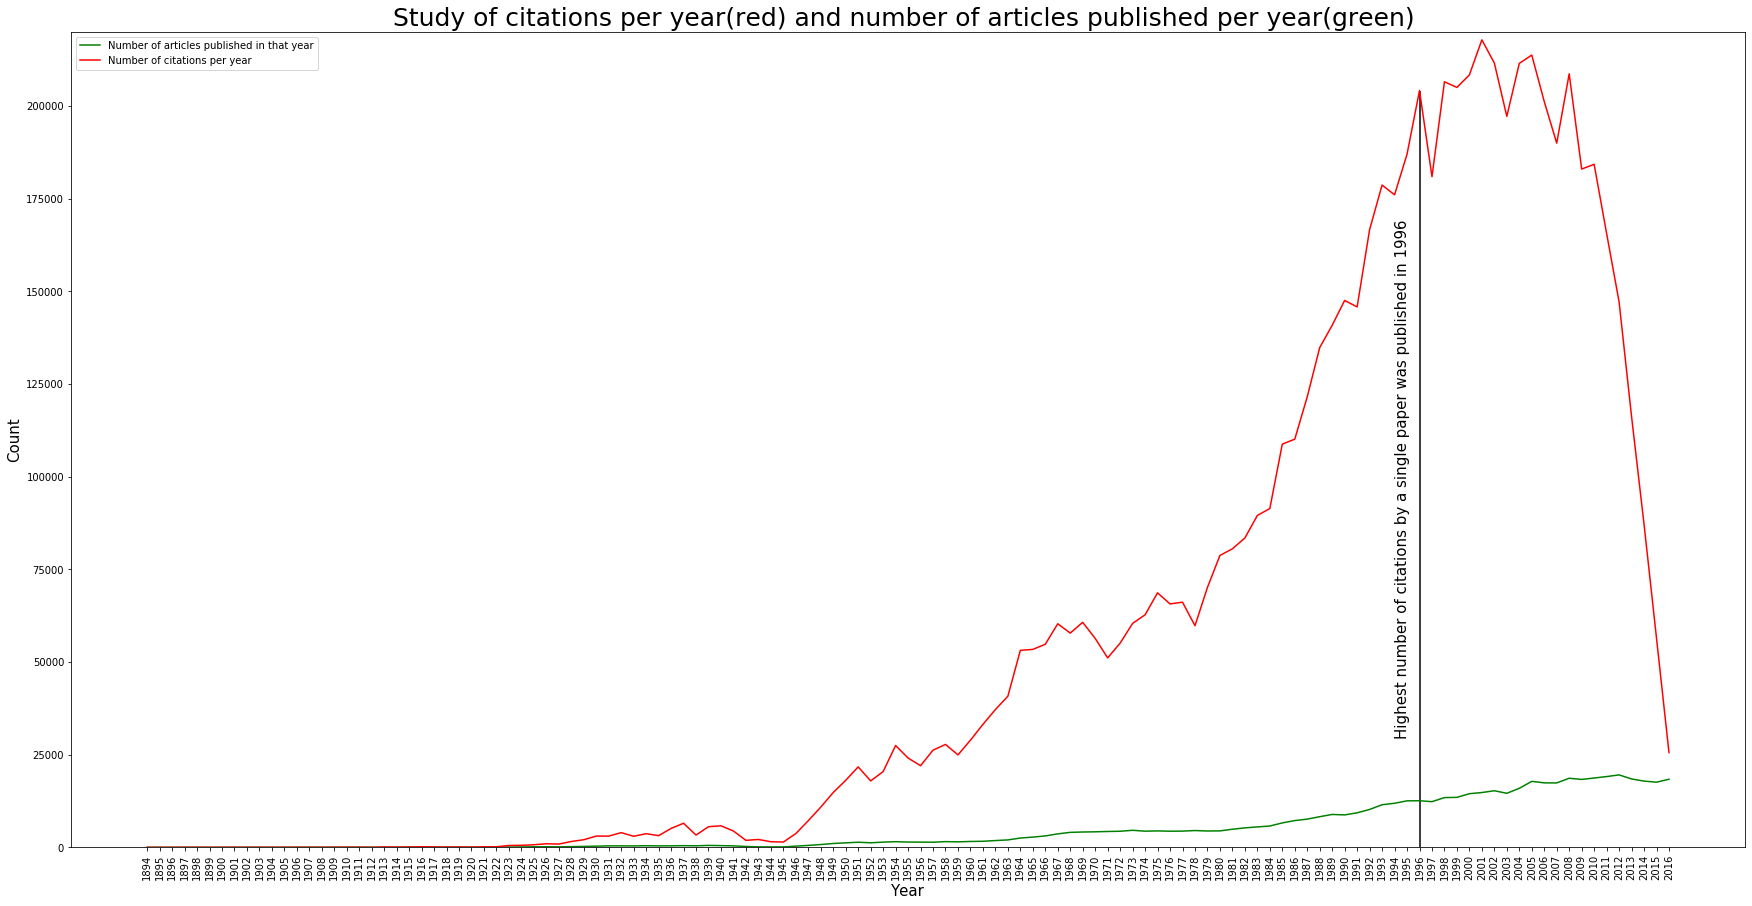

In [73]:
x=range(1,124)
plt.figure(figsize=(30,15))
plt.xticks(x,hypo2['Year'],rotation=90)
plt.plot(x,hypo2['Number of articles published in that year'],label='Number of articles published in that year',c='green')
plt.plot(x,hypo2['Number of citations per year'],label='Number of citations per year',c='r')
plt.legend()
plt.vlines(103,0,204000)
plt.ylim(0,220000)
plt.title("Study of citations per year(red) and number of articles published per year(green) ",size=25)
plt.ylabel("Count",size=15)
plt.xlabel("Year",size=15)
plt.annotate("Highest number of citations by a single paper was published in 1996",(103,210000),(101,30000),rotation=90,size=15)

#From this we can see that over the years more articles started to get published each year. Interestingly we also observe that papers between 1985 - 2010 got cited the most. From this we can see that the recent articles have been heavily built on the work established in the articles between this period.